# MODULES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# AUTO DATA SET

In [2]:
#downloading the auto data set and viewing its description
#data was transformed from .data file to .csv using split column by fixed 
#width on excel 
input_file = "Auto.csv"
df = pd.read_csv(input_file)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinder      397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   accelaration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [3]:
#creating a binary variable(0,1), named mpg01, based on the median mpg
median_mpg = df["mpg"].median()
df["mpg01"] = (df["mpg"] >= df["mpg"].median()).astype(int)
print(df)

      mpg  cylinder  displacement horsepower  weight  accelaration  year  \
0    18.0         8         307.0        130    3504          12.0    70   
1    15.0         8         350.0        165    3693          11.5    70   
2    18.0         8         318.0        150    3436          11.0    70   
3    16.0         8         304.0        150    3433          12.0    70   
4    17.0         8         302.0        140    3449          10.5    70   
..    ...       ...           ...        ...     ...           ...   ...   
392  27.0         4         140.0         86    2790          15.6    82   
393  44.0         4          97.0         52    2130          24.6    82   
394  32.0         4         135.0         84    2295          11.6    82   
395  28.0         4         120.0         79    2625          18.6    82   
396  31.0         4         119.0         82    2720          19.4    82   

     origin                       name  mpg01  
0         1  chevrolet chevelle malibu 

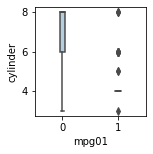

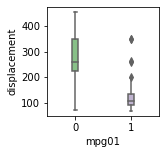

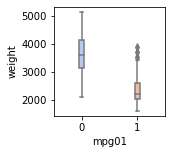

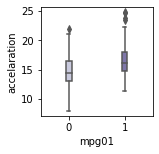

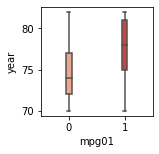

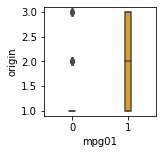

In [4]:
#exploring the data graphically using boxplots to view any associations
#box-plots shows that mpg01 is correlated with cylinder, displacement, and origin 
plt.figure(figsize=(2,2))
c = sns.boxplot(x=df["mpg01"], y=df["cylinder"], palette="Blues", width=0.1);
plt.show(c)
plt.figure(figsize=(2,2))
d = sns.boxplot(x=df["mpg01"], y=df["displacement"], palette="Accent", width=0.1);
plt.show(d)
plt.figure(figsize=(2,2))
w = sns.boxplot(x=df["mpg01"], y=df["weight"], palette="coolwarm", width=0.1);
plt.show(w)
plt.figure(figsize=(2,2))
a = sns.boxplot(x=df["mpg01"], y=df["accelaration"], palette="Purples", width=0.1);
plt.show(a)
plt.figure(figsize=(2,2))
y = sns.boxplot(x=df["mpg01"], y=df["year"], palette="Reds", width=0.1);
plt.show(y)
plt.figure(figsize=(2,2))
o = sns.boxplot(x=df["mpg01"], y=df["origin"], palette="autumn", width=0.1);
plt.show(o)

In [5]:
#exploring associations between mpg01 and other features. 
#medium positive correlation with origin, year, and acceleration
#strong negative correlation with displacement, weight, and cylinder
corr_matrix = df.corr()
corr_matrix["mpg01"].sort_values(ascending=False)

mpg01           1.000000
mpg             0.834672
origin          0.509982
year            0.430619
accelaration    0.346069
displacement   -0.754522
weight         -0.757516
cylinder       -0.760944
Name: mpg01, dtype: float64

In [6]:
#splitting the data into training and test set: 80% train, 20% test 
np.random.seed(56)
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
train_set, test_set = split_train_test(df, 0.2)
print(len(train_set))
print(len(test_set))
train_set.head()

318
79


,mpg,cylinder,displacement,horsepower,weight,accelaration,year,origin,name,mpg01
44,13.0,8,400.0,175,5140,12.0,71,1,pontiac safari (sw),0
173,24.0,4,119.0,97,2545,17.0,75,3,datsun 710,1
84,27.0,4,97.0,88,2100,16.5,72,3,toyota corolla 1600 (sw),1
49,23.0,4,122.0,86,2220,14.0,71,1,mercury capri 2000,1
23,26.0,4,121.0,113,2234,12.5,70,2,bmw 2002,1


In [7]:
#using only highly correlated features to train data set 
feature_cols = ['cylinder','weight','displacement']
X1 = train_set.loc[:,feature_cols]
#print(X1.shape)
y1 = train_set.mpg01
#print(y1.shape)
X2 = test_set.loc[:,feature_cols]
#print(X2.shape)
y2 = test_set.mpg01
#print(y2.shape)

In [8]:
logreg = LogisticRegression(random_state=56) 
logreg.fit(X1, y1)

LogisticRegression(random_state=56)

In [9]:
#training instance to check model using one training data
logreg.predict(train_set.loc[:,feature_cols])
#print(train_set.loc[:,feature_cols])
#log.predict works very well on the training set. 

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,

In [10]:
#using test data to find the test error 
y2_predict = logreg.predict(X2)
log_mse = mean_squared_error(y2,y2_predict)
log_rmse = np.sqrt(log_mse)
print(log_mse)
print(log_rmse)

0.12658227848101267
0.35578403348241006


In [ ]:
#fitting data with SVC with several parameter
#SVM Classifier model 
#see this for more info https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
svm_clf1 = SVC(kernel="linear", C=1) #c=1
svm_clf1.fit(X1, y1)
svm_clf2 = SVC(kernel="linear", C=10) #c=10
svm_clf2.fit(X1, y1)
svm_clf3 = SVC(kernel="poly", degree=5, gamma=1,  C=10) #poly kernel
svm_clf3.fit(X1, y1)
svm_clf4 = SVC(kernel="rbf", gamma=1, C=10) #radial kernel 
svm_clf4.fit(X1, y1)

In [ ]:
#"cross_val_score" splits the data into say 5 folds.
#Then for each fold it fits the data on 4 folds and scores the 5th fold. 
#Then it gives you the 5 scores from which you can calculate a mean 
#and variance for the score. You crossval to tune parameters 
#and get an estimate of the score.

#cross validation for svm_clf1
scores1 = cross_val_score(svm_clf1, X1, y1, scoring="neg_mean_squared_error", cv=10)
svm_clf1_rmse_scores = np.sqrt(-scores1)

#cross validation for svm_clf2
scores2 = cross_val_score(svm_clf2, X1, y1, scoring="neg_mean_squared_error", cv=10)
svm_clf2_rmse_scores = np.sqrt(-scores2)

#cross validation for svm_clf3
scores3 = cross_val_score(svm_clf3, X1, y1, scoring="neg_mean_squared_error", cv=10)
svm_clf3_rmse_scores = np.sqrt(-scores2)

#cross validation for svm_clf4
scores4 = cross_val_score(svm_clf4, X1, y1, scoring="neg_mean_squared_error", cv=10)
svm_clf4_rmse_scores = np.sqrt(-scores2)

In [ ]:
def display_scores(scores1,scores2,score3,scores4):
    print("Scores1:", scores1)
    print("Mean:", scores1.mean())
    print("Standard deviation:", scores1.std())
    print("Scores2:", scores2)
    print("Mean:", scores2.mean())
    print("Standard deviation:", scores2.std())
    print("Scores3:", scores3)
    print("Mean:", scores3.mean())
    print("Standard deviation:", scores3.std())
    print("Scores4:", scores4)
    print("Mean:", scores4.mean())
    print("Standard deviation:", scores4.std())

display_scores(svm_clf1_rmse_scores,svm_clf2_rmse_scores,svm_clf3_rmse_scores,svm_clf4_rmse_scores)

# COLLEGE DATASET 

In [5]:
#downloading college.csv file 
input_file2 = "College.csv"
df2 = pd.read_csv(input_file2)
#df2.info()
cat = df2[["Private"]]
#cat.head(10)
ordinal_encoder = OrdinalEncoder()
df2[["Private"]] = ordinal_encoder.fit_transform(cat)
#cat_encoded[:10]
ordinal_encoder.categories_
df2[["Private"]]
#df2.hist(bins=50, figsize=(20,15))
#df2.describe()

,Private
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
772,0.0
773,1.0
774,1.0
775,1.0


In [6]:
#spliting the data set into training set and test set 
np.random.seed(44)
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
train_set2, test_set2 = split_train_test(df2, 0.2)
print(len(train_set2))
print(len(test_set2))
train_set2.head()

622
155


,University,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
302,Lakeland College,1.0,497,452,231,24,47,887,1957,9400,4005,500,1000,49,65,17.2,25,4054,57
425,Norwich University,1.0,1743,1625,626,8,29,1862,382,14134,5270,500,800,71,74,13.1,22,9209,63
137,College of the Holy Cross,1.0,2994,1691,659,70,95,2675,22,18000,6300,400,900,92,96,11.3,55,12138,95
485,Rutgers State University at Newark,0.0,5785,2690,499,26,62,4005,1886,7410,4748,690,2009,90,95,17.4,16,11878,58
471,Rensselaer Polytechnic Institute,1.0,4996,4165,936,53,82,4291,16,17475,5976,1230,1100,94,98,15.4,21,15605,70


In [7]:
#checking for any correlations between Apps and other features 
corr_matrix = train_set2.corr()
corr_matrix["Apps"].sort_values(ascending=False)
#df2 = df2.drop(["University"])

Apps           1.000000
Accept         0.934575
Enroll         0.878390
F.Undergrad    0.842406
PhD            0.412210
P.Undergrad    0.409107
Terminal       0.382765
Top10perc      0.379396
Top25perc      0.377299
Expend         0.291282
Room.Board     0.176696
Grad.Rate      0.171718
Personal       0.170448
Books          0.152413
Outstate       0.093228
S.F.Ratio      0.051522
perc.alumni   -0.094856
Private       -0.431342
Name: Apps, dtype: float64

In [61]:
#normalization on train_set2
features = train_set2[["Apps","Accept", "Enroll", "F.Undergrad"]]
autoscaler = StandardScaler()
features = autoscaler.fit_transform(features)
print(features)
Apps = features[:,0]
Accept = features[:,1]
Enroll = features[:,2]
FUndergrad = features[:,3]
data = Apps, Accept, Enroll, FUndergrad
df3 = pd.DataFrame(data)
df3 = df3.transpose()
#df_new = df.rename(columns={'A': 'a'}, index={'ONE': 'one'})
df3 = df3.rename(columns = {0:'Apps',1:'Accept',2:'Enroll',3:"F.Undergrad"})


#normalization on test_set2
features2 = test_set2[["Apps","Accept", "Enroll", "F.Undergrad"]]
autoscaler = StandardScaler()
features2 = autoscaler.fit_transform(features)
print(features2)
Apps2 = features2[:,0]
Accept2 = features2[:,1]
Enroll2 = features2[:,2]
FUndergrad2 = features[:,3]
data = Apps2, Accept2, Enroll2, FUndergrad2
df4 = pd.DataFrame(data)
df4 = df4.transpose()
#df_new = df.rename(columns={'A': 'a'}, index={'ONE': 'one'})
df4 = df4.rename(columns = {0:'Apps',1:'Accept',2:'Enroll',3:"F.Undergrad"})
                 

[[-0.6837556  -0.65746667 -0.5886674  -0.57359106]
 [-0.33069083 -0.14703751 -0.14417404 -0.36611764]
 [ 0.02379073 -0.11831771 -0.10703915 -0.19311672]
 ...
 [-0.62623381 -0.57130727 -0.49526753 -0.53571386]
 [-0.33210762 -0.25669492 -0.37936167 -0.47825968]
 [ 0.84468048  1.29156334  1.37160458  1.63137265]]
[[-0.6837556  -0.65746667 -0.5886674  -0.57359106]
 [-0.33069083 -0.14703751 -0.14417404 -0.36611764]
 [ 0.02379073 -0.11831771 -0.10703915 -0.19311672]
 ...
 [-0.62623381 -0.57130727 -0.49526753 -0.53571386]
 [-0.33210762 -0.25669492 -0.37936167 -0.47825968]
 [ 0.84468048  1.29156334  1.37160458  1.63137265]]


In [93]:
#training
features_ = df3.drop(['Apps'], axis = 1)
labels = df3["Apps"]
lin_reg = LinearRegression()

#tuning lasso and ridge for best λ
lasso_params = {'alpha':[0.02, 0.002, 0.025, 0.026, 0.03]}
ridge_params = {'alpha':[0.1, 0.2, 0.3, 0.4, 0.5]}

lasso2 = {'Lasso': GridSearchCV(Lasso(), param_grid=lasso_params).fit(features_, labels).best_estimator_}
ridge2 = {'Ridge': GridSearchCV(Ridge(), param_grid=ridge_params).fit(features_, labels).best_estimator_,}
print(lasso2)
print(ridge2)

#use best λ from tuning 
lasso_reg = Lasso(alpha=0.02)
ridge_reg = Ridge(alpha=0.1, solver="cholesky", random_state=42)

model = lin_reg.fit(features_, labels)
model2 = ridge_reg.fit(features_, labels)
model3 = lasso_reg.fit(features_, labels)

#testing
features_2 = df4.drop(['Apps'], axis = 1)
labels2 = df4['Apps']
#print(features_2)
#print(labels2)
predict1 = model.predict(features_2)
predict2 = model2.predict(features_2)
predict3 = model3.predict(features_2)
lin_mse = mean_squared_error(labels2,predict1)
lin_rmse = np.sqrt(lin_mse)
ridge_mse2 = mean_squared_error(labels2,predict2)
ridge_rmse2 = np.sqrt(lin_mse2)
lasso_mse3 = mean_squared_error(labels2,predict3)
lasso_rmse3 = np.sqrt(lin_mse3)
print("The lin_mse is",lin_mse)
print("The lin_rmse is", lin_rmse)
print("The ridge_mse is", ridge_mse2)
print("The ridge_rmse is", ridge_rmse2)
print("The lasso_mse is", lasso_mse3)
print("The lasso_rmse is", lasso_rmse3)

{'Lasso': Lasso(alpha=0.002)}
{'Ridge': Ridge(alpha=0.1)}
The lin_mse is 0.12624729517195526
The lin_rmse is 0.3553129538476683
The ridge_mse is 0.1262474586898478
The ridge_rmse is 0.3553348886942164
The lasso_mse is 0.12667104500293908
The lasso_rmse is 0.369552173175188
